In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Question 1

In [3]:
#importing data sheet 2
insurance_data = pd.read_excel("/Exercise_data_Data_Analyst.xlsx", 1)

In [4]:
insurance_data.head()

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,premiums,Premiums,aviation,ar,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,NaN
1,premiums,Premiums,marine,ae,USD,Assumption based,NaN,NaN,NaN,NaN,NaN,NaN,1.050546e+08,1.219875e+08,1.291155e+08,1.427171e+08,1.487662e+08,1.480338e+08,1.091010e+08,NaN,NaN
2,premiums,Premiums,aviation,at,USD,NaN,NaN,3.440142e+07,3.491657e+07,2.872530e+07,2.485406e+07,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,NaN,NaN
3,premiums,Premiums,marine,ar,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.221323e+07,2.593741e+07,2.609305e+07,2.571256e+07,2.666382e+07,2.291803e+07,NaN
4,premiums,Premiums,aviation,br,USD,NaN,8.731772e+07,1.196424e+08,1.429795e+08,1.250661e+08,1.516988e+08,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,NaN


In [5]:
#selection of aviation premium rows and storing in new dataframe
aviation_insurance_data = insurance_data.loc[insurance_data['lob']=='aviation']

In [6]:
aviation_insurance_data.head()

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,premiums,Premiums,aviation,ar,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,NaN
2,premiums,Premiums,aviation,at,USD,NaN,NaN,3.440142e+07,3.491657e+07,2.872530e+07,2.485406e+07,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,NaN,NaN
4,premiums,Premiums,aviation,br,USD,NaN,8.731772e+07,1.196424e+08,1.429795e+08,1.250661e+08,1.516988e+08,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,NaN
5,premiums,Premiums,aviation,ca,USD,NaN,NaN,NaN,NaN,2.572170e+08,2.402023e+08,2.625895e+08,2.575498e+08,2.810476e+08,2.781032e+08,2.804343e+08,2.786604e+08,2.256542e+08,2.043025e+08,2.559902e+08,NaN
7,premiums,Premiums,aviation,cl,USD,NaN,NaN,NaN,NaN,2.881798e+07,3.125959e+07,2.659035e+07,2.493776e+07,3.382870e+07,2.951063e+07,3.254212e+07,3.585596e+07,3.216052e+07,3.259157e+07,2.496187e+07,NaN


In [7]:
# replacing missing values with column means
aviation_insurance_data_modified = aviation_insurance_data.iloc[:,6:22].where(pd.notna(aviation_insurance_data.iloc[:,6:22]), 
                                                                 aviation_insurance_data.iloc[:,6:22].mean(), axis="columns")

In [8]:
 aviation_insurance_data_modified = pd.concat([aviation_insurance_data.iloc[:, 0:6], aviation_insurance_data_modified],
                                              axis=1)

In [9]:
aviation_insurance_data_modified.head()

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,premiums,Premiums,aviation,ar,USD,NaN,1.996003e+08,1.489228e+08,2.021433e+08,1.990422e+08,1.865056e+08,1.695211e+08,2.451786e+08,1.779838e+08,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,2.262700e+08
2,premiums,Premiums,aviation,at,USD,NaN,1.996003e+08,3.440142e+07,3.491657e+07,2.872530e+07,2.485406e+07,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,1.534070e+08,2.262700e+08
4,premiums,Premiums,aviation,br,USD,NaN,8.731772e+07,1.196424e+08,1.429795e+08,1.250661e+08,1.516988e+08,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,2.262700e+08
5,premiums,Premiums,aviation,ca,USD,NaN,1.996003e+08,1.489228e+08,2.021433e+08,2.572170e+08,2.402023e+08,2.625895e+08,2.575498e+08,2.810476e+08,2.781032e+08,2.804343e+08,2.786604e+08,2.256542e+08,2.043025e+08,2.559902e+08,2.262700e+08
7,premiums,Premiums,aviation,cl,USD,NaN,1.996003e+08,1.489228e+08,2.021433e+08,2.881798e+07,3.125959e+07,2.659035e+07,2.493776e+07,3.382870e+07,2.951063e+07,3.254212e+07,3.585596e+07,3.216052e+07,3.259157e+07,2.496187e+07,2.262700e+08


In [10]:
aviation_insurance_data_modified['comments'].fillna('Actual value based', inplace = True)

In [11]:
aviation_insurance_data_modified.head()

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,premiums,Premiums,aviation,ar,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,1.990422e+08,1.865056e+08,1.695211e+08,2.451786e+08,1.779838e+08,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,2.262700e+08
2,premiums,Premiums,aviation,at,USD,Actual value based,1.996003e+08,3.440142e+07,3.491657e+07,2.872530e+07,2.485406e+07,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,1.534070e+08,2.262700e+08
4,premiums,Premiums,aviation,br,USD,Actual value based,8.731772e+07,1.196424e+08,1.429795e+08,1.250661e+08,1.516988e+08,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,2.262700e+08
5,premiums,Premiums,aviation,ca,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,2.572170e+08,2.402023e+08,2.625895e+08,2.575498e+08,2.810476e+08,2.781032e+08,2.804343e+08,2.786604e+08,2.256542e+08,2.043025e+08,2.559902e+08,2.262700e+08
7,premiums,Premiums,aviation,cl,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,2.881798e+07,3.125959e+07,2.659035e+07,2.493776e+07,3.382870e+07,2.951063e+07,3.254212e+07,3.585596e+07,3.216052e+07,3.259157e+07,2.496187e+07,2.262700e+08


In [12]:
for i in range(2001,2015):
  aviation_insurance_data_modified['YoY ' + str(i+1)] = ((aviation_insurance_data_modified[i+1] - aviation_insurance_data_modified[i])*100)/aviation_insurance_data_modified[i]


In [13]:
aviation_insurance_data_modified.head(4)

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,YoY 2002,YoY 2003,YoY 2004,YoY 2005,YoY 2006,YoY 2007,YoY 2008,YoY 2009,YoY 2010,YoY 2011,YoY 2012,YoY 2013,YoY 2014,YoY 2015
0,premiums,Premiums,aviation,ar,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,1.990422e+08,1.865056e+08,1.695211e+08,2.451786e+08,1.779838e+08,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,2.262700e+08,-25.389477,35.736937,-1.534118,-6.298444,-9.106722,44.630166,-27.406481,-85.033605,23.992622,9.655057,-7.733349,3.135978,-14.309343,666.154498
2,premiums,Premiums,aviation,at,USD,Actual value based,1.996003e+08,3.440142e+07,3.491657e+07,2.872530e+07,2.485406e+07,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,1.534070e+08,2.262700e+08,-82.764848,1.497473,-17.731614,-13.476752,-12.563538,-12.034381,-18.693409,-27.487104,-8.004677,13.799574,-7.944029,-2.471421,1348.141373,47.496532
4,premiums,Premiums,aviation,br,USD,Actual value based,8.731772e+07,1.196424e+08,1.429795e+08,1.250661e+08,1.516988e+08,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,2.262700e+08,37.019656,19.505659,-12.528661,21.294916,-31.738372,102.393419,-13.059308,-0.396984,19.469294,-7.536845,9.179041,-17.860485,9.154478,15.297054
5,premiums,Premiums,aviation,ca,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,2.572170e+08,2.402023e+08,2.625895e+08,2.575498e+08,2.810476e+08,2.781032e+08,2.804343e+08,2.786604e+08,2.256542e+08,2.043025e+08,2.559902e+08,2.262700e+08,-25.389477,35.736937,27.244915,-6.614925,9.320131,-1.919232,9.123601,-1.047646,0.838202,-0.632556,-19.021788,-9.462152,25.299626,-11.609925


In [14]:
cols = aviation_insurance_data_modified.loc[:, 'YoY 2002':'YoY 2015']
aviation_insurance_data_modified['YoY aggregate'] = cols.mean(axis=1)

In [15]:
aviation_insurance_data_modified.head()

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,YoY 2002,YoY 2003,YoY 2004,YoY 2005,YoY 2006,YoY 2007,YoY 2008,YoY 2009,YoY 2010,YoY 2011,YoY 2012,YoY 2013,YoY 2014,YoY 2015,YoY aggregate
0,premiums,Premiums,aviation,ar,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,1.990422e+08,1.865056e+08,1.695211e+08,2.451786e+08,1.779838e+08,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,2.262700e+08,-25.389477,35.736937,-1.534118,-6.298444,-9.106722,44.630166,-27.406481,-85.033605,23.992622,9.655057,-7.733349,3.135978,-14.309343,666.154498,43.320980
2,premiums,Premiums,aviation,at,USD,Actual value based,1.996003e+08,3.440142e+07,3.491657e+07,2.872530e+07,2.485406e+07,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,1.534070e+08,2.262700e+08,-82.764848,1.497473,-17.731614,-13.476752,-12.563538,-12.034381,-18.693409,-27.487104,-8.004677,13.799574,-7.944029,-2.471421,1348.141373,47.496532,86.268798
4,premiums,Premiums,aviation,br,USD,Actual value based,8.731772e+07,1.196424e+08,1.429795e+08,1.250661e+08,1.516988e+08,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,2.262700e+08,37.019656,19.505659,-12.528661,21.294916,-31.738372,102.393419,-13.059308,-0.396984,19.469294,-7.536845,9.179041,-17.860485,9.154478,15.297054,10.728061
5,premiums,Premiums,aviation,ca,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,2.572170e+08,2.402023e+08,2.625895e+08,2.575498e+08,2.810476e+08,2.781032e+08,2.804343e+08,2.786604e+08,2.256542e+08,2.043025e+08,2.559902e+08,2.262700e+08,-25.389477,35.736937,27.244915,-6.614925,9.320131,-1.919232,9.123601,-1.047646,0.838202,-0.632556,-19.021788,-9.462152,25.299626,-11.609925,2.276122
7,premiums,Premiums,aviation,cl,USD,Actual value based,1.996003e+08,1.489228e+08,2.021433e+08,2.881798e+07,3.125959e+07,2.659035e+07,2.493776e+07,3.382870e+07,2.951063e+07,3.254212e+07,3.585596e+07,3.216052e+07,3.259157e+07,2.496187e+07,2.262700e+08,-25.389477,35.736937,-85.743787,8.472529,-14.936964,-6.214999,35.652482,-12.764513,10.272547,10.183234,-10.306341,1.340291,-23.410048,806.462487,52.096741


In [16]:
# Comparing YoY growth rates for global aviation premiums for actual value based countries vs 
# assumption based countries using swarm, box and violin plots 

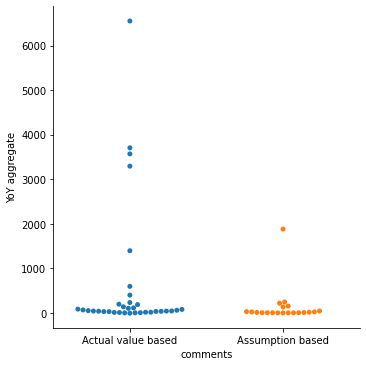

In [17]:
sns.catplot(x="comments", y="YoY aggregate", kind='swarm',data=aviation_insurance_data_modified)

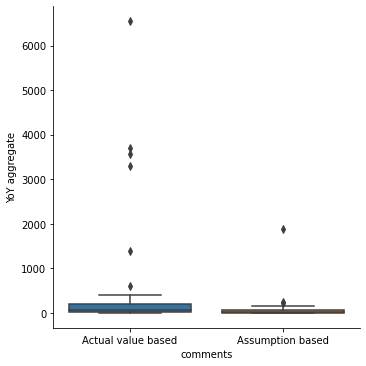

In [18]:
sns.catplot(x="comments", y="YoY aggregate", kind='box',data=aviation_insurance_data_modified)

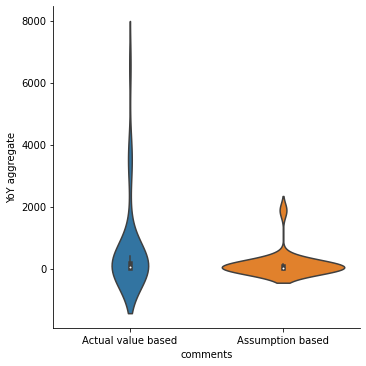

In [19]:
sns.catplot(x="comments", y="YoY aggregate", kind='violin',data=aviation_insurance_data_modified)

In [20]:
#Question 2

In [21]:
marine_insurance_data = insurance_data.loc[insurance_data['lob']=='marine']

In [22]:
# replacing missing values with column means
marine_insurance_data_modified = marine_insurance_data.iloc[:,6:22].where(pd.notna(marine_insurance_data.iloc[:,6:22]), 
                                                                 marine_insurance_data.iloc[:,6:22].mean(), axis="columns")

In [23]:
marine_insurance_data_modified = pd.concat([marine_insurance_data.iloc[:, 0:6], marine_insurance_data_modified],
                                              axis=1)

In [24]:
marine_insurance_data_modified.head()

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,premiums,Premiums,marine,ae,USD,Assumption based,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,2.901216e+08,2.735304e+08,1.050546e+08,1.219875e+08,1.291155e+08,1.427171e+08,1.487662e+08,1.480338e+08,1.091010e+08,1.871700e+08,1.295635e+08
3,premiums,Premiums,marine,ar,USD,NaN,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,2.901216e+08,2.735304e+08,2.448399e+08,2.359785e+08,2.221323e+07,2.593741e+07,2.609305e+07,2.571256e+07,2.666382e+07,2.291803e+07,1.295635e+08
6,premiums,Premiums,marine,au,USD,Assumption based,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,1.051660e+08,1.058171e+08,1.205243e+08,1.208170e+08,1.190940e+08,1.454430e+08,1.674157e+08,1.709603e+08,1.630179e+08,1.539032e+08,1.295635e+08
8,premiums,Premiums,marine,be,USD,Assumption based,3.335160e+07,4.268902e+07,5.720635e+07,6.289631e+07,6.068621e+07,7.175497e+07,7.190584e+07,8.927244e+07,7.404708e+07,6.867878e+07,8.081652e+07,6.383029e+07,5.879019e+07,1.871700e+08,1.295635e+08
10,premiums,Premiums,marine,bh,USD,Assumption based,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,2.901216e+08,2.735304e+08,4.297154e+06,4.670692e+06,4.919522e+06,4.982137e+06,4.421368e+06,4.359424e+06,3.785590e+06,1.871700e+08,1.295635e+08


In [25]:
#CAGR calculated for 2010-2014 (as most values for 2015 missing) for last 5 years
marine_insurance_data_modified['CAGR 2010-2014 (5 years)'] = ((marine_insurance_data_modified[2010]/marine_insurance_data_modified[2014])**(0.2)) - 1


In [27]:
marine_insurance_data_modified.head(4)

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,CAGR 2010-2014 (5 years)
1,premiums,Premiums,marine,ae,USD,Assumption based,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,2.901216e+08,2.735304e+08,1.050546e+08,1.219875e+08,1.291155e+08,1.427171e+08,1.487662e+08,1.480338e+08,1.091010e+08,1.871700e+08,1.295635e+08,-0.052786
3,premiums,Premiums,marine,ar,USD,NaN,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,2.901216e+08,2.735304e+08,2.448399e+08,2.359785e+08,2.221323e+07,2.593741e+07,2.609305e+07,2.571256e+07,2.666382e+07,2.291803e+07,1.295635e+08,0.025061
6,premiums,Premiums,marine,au,USD,Assumption based,1.442401e+08,1.484792e+08,1.845536e+08,2.790499e+08,1.051660e+08,1.058171e+08,1.205243e+08,1.208170e+08,1.190940e+08,1.454430e+08,1.674157e+08,1.709603e+08,1.630179e+08,1.539032e+08,1.295635e+08,-0.011244
8,premiums,Premiums,marine,be,USD,Assumption based,3.335160e+07,4.268902e+07,5.720635e+07,6.289631e+07,6.068621e+07,7.175497e+07,7.190584e+07,8.927244e+07,7.404708e+07,6.867878e+07,8.081652e+07,6.383029e+07,5.879019e+07,1.871700e+08,1.295635e+08,-0.181691


In [30]:
marine_insurance_data_modified[['Country', 'CAGR 2010-2014 (5 years)']]

,Country,CAGR 2010-2014 (5 years)
1,ae,-0.052786
3,ar,0.025061
6,au,-0.011244
8,be,-0.181691
10,bh,-0.515788
12,br,-0.046430
14,bw,0.011436
16,ca,-0.013736
18,ch,0.001758
20,cl,-0.016673
